# Regression Trees 
## 1. Import packages 

In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from scipy.stats import uniform, loguniform, randint
from sklearn.ensemble import RandomForestRegressor

## 2. Prepare data 

In [7]:
#load data
df = pd.read_csv("C:/Users/julie/supervised_project/dataframe_PS_3.csv", index_col='Unnamed: 0')

#define X and y 
X = df[[
    'temp_DE', 
    'weekday', 
    'hour', 
    'season', 
    'year',
    'Q_DE_lag1',
    'Q_AT_lag1', 
    'Q_BE_lag1', 
    'Q_FR_lag1', 
    'Q_NL_lag1'
       ]]


y = df['Q_DE']


#split the dataframe betweenn train and test datasets
X_train = X.iloc[:round(len(df)*0.75)]
y_train = y.iloc[:round(len(df)*0.75)]
X_test = X.iloc[round(len(df)*0.75):]
y_test = y.iloc[round(len(df)*0.75):]

## 3. Hyperparameter tuning

In [8]:
def report(results, n_top=3):
    '''https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html
    '''
    # Utility function to report best scores
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [10]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 47.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 112.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [37]:
report(rf_random.cv_results_)

Model with rank: 1
Mean validation score: 0.993 (std: 0.002)
Parameters: {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}

Model with rank: 2
Mean validation score: 0.993 (std: 0.002)
Parameters: {'n_estimators': 1800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}

Model with rank: 3
Mean validation score: 0.993 (std: 0.002)
Parameters: {'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': True}



## 4. Estimation 

In [17]:
regr = RandomForestRegressor(n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features="auto", max_depth=None, bootstrap=True) 
regr.fit(X_train, y_train)
preds = regr.predict(X_test)


RandomForestRegressor(min_samples_leaf=2, min_samples_split=5, n_estimators=800)

## 5. Evaluation 

Root mean squared error is equal to : 820.6535929366315
Mean Absolute percentage error is equal to: 0.8916404337713842


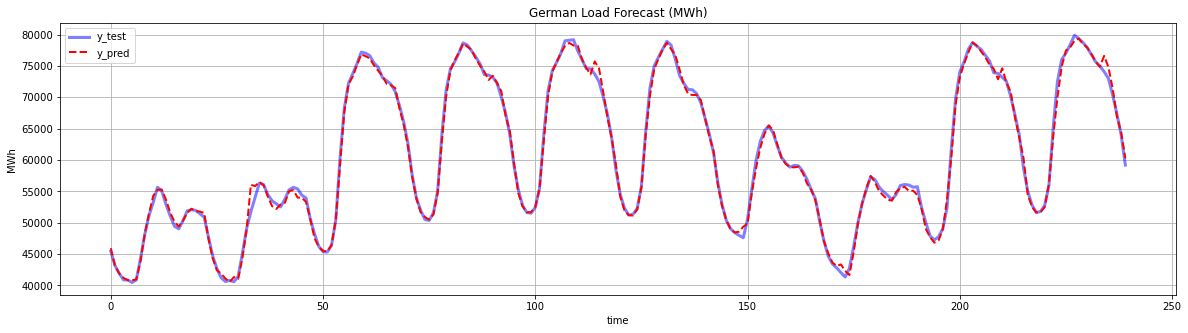

In [35]:
RMSE_tree = np.sqrt(mean_squared_error(preds,y_test))

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Root mean squared error is equal to :",RMSE_tree)
print("Mean Absolute percentage error is equal to:", mean_absolute_percentage_error(y_test, preds))

#plot the results (last ten days of testing data)
plt.figure(figsize=(20,5))
plt.plot(y_test.values[-240:], c='b', label='y_test', lw=3, alpha=0.5)
plt.plot(preds[-240:], '--', c='r', label='y_pred', lw=2)
plt.legend()
plt.grid()
plt.title('German Load Forecast (MWh)')
plt.xlabel('time')
plt.ylabel('MWh')
plt.savefig('treepred.png')

## 6. Features importances

Text(0, 0.5, 'Feature Importance')

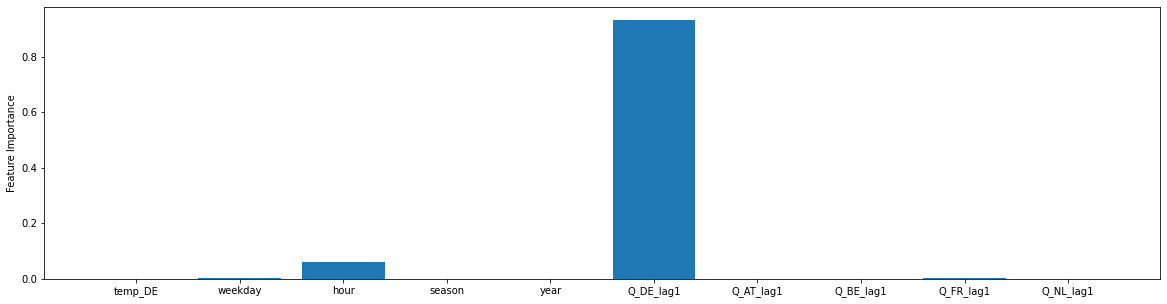

In [36]:
features_importances = regr.feature_importances_

plt.figure(figsize=(20,5))
plt.bar(X.columns.to_list(),features_importances)
plt.ylabel("Feature Importance")